# Created By
- Mohammed Essam Mohammed 20220299
- Amr Ehab Abdel Zahir 20221110

In [ ]:
%pip install matplotlib seaborn pandas scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


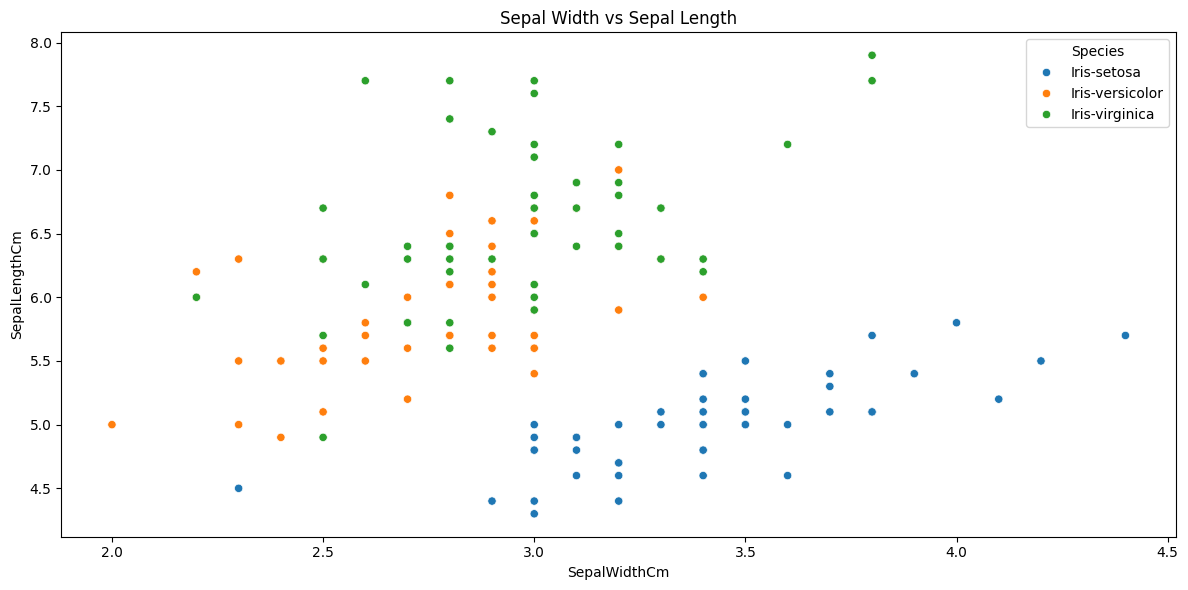

In [6]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='SepalWidthCm', y='SepalLengthCm', hue='Species')
plt.title('Sepal Width vs Sepal Length')

plt.tight_layout()
plt.show()

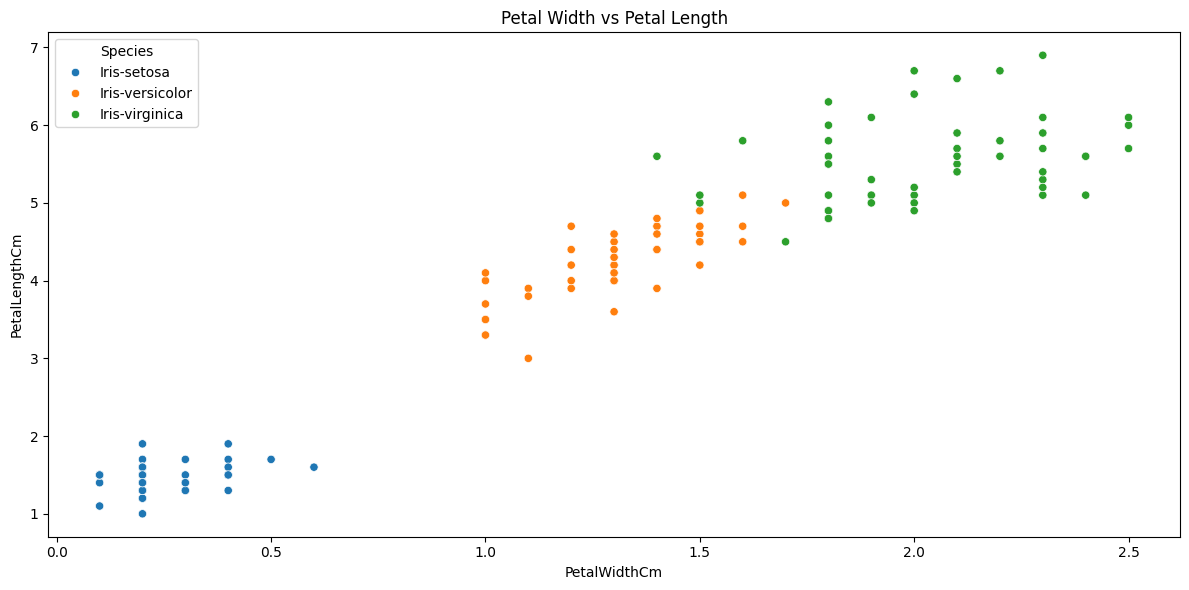

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='PetalWidthCm', y='PetalLengthCm', hue='Species')
plt.title('Petal Width vs Petal Length')

plt.tight_layout()
plt.show()

In [8]:
X = df.drop(columns=['Id', 'Species'])
Y = df['Species']

print(X.head())
print(Y.head())

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0            5.1           3.5            1.4           0.2
1            4.9           3.0            1.4           0.2
2            4.7           3.2            1.3           0.2
3            4.6           3.1            1.5           0.2
4            5.0           3.6            1.4           0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object


In [ ]:
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


def KNeighboursClassifier(X_train, Y_train, X_test, k=3):
    predictions = []
    for i in range(len(X_test)):
        distances = np.sqrt(np.sum((X_train - X_test.iloc[i]) ** 2, axis=1))
        neighbours = Y_train.iloc[np.argsort(distances)[:k]]
        predictions.append(neighbours.value_counts().idxmax())
    return predictions

Y_pred = KNeighboursClassifier(X_train, Y_train, X_test, k=3)

accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy}')

correct = np.sum(Y_test == Y_pred)
wrong = np.sum(Y_test != Y_pred)
print(f'Correct: {correct}')
print(f'Wrong: {wrong}')


Accuracy: 0.9666666666666667
Correct: 29
Wrong: 1
